In [1]:
import pandas as pd

dataset = pd.read_csv('resources/mobile.csv', encoding='windows-1251', sep='\t')

In [2]:
# извлекаем переменные, которые нам будут интересны для построения графиков
serial = dataset['Код'].values
mean_cost_overmonth = dataset['Среднемесячный расход'].values
mean_duration_overmonth = dataset['Средняя продолжительность разговоров'].values
sms_count_overmonth = dataset['Количество SMS за месяц'].values
age = dataset['Возраст'].values

C:\Users\User\AppData\Local\Temp\ipykernel_9592\3940652533.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f_hist.show()


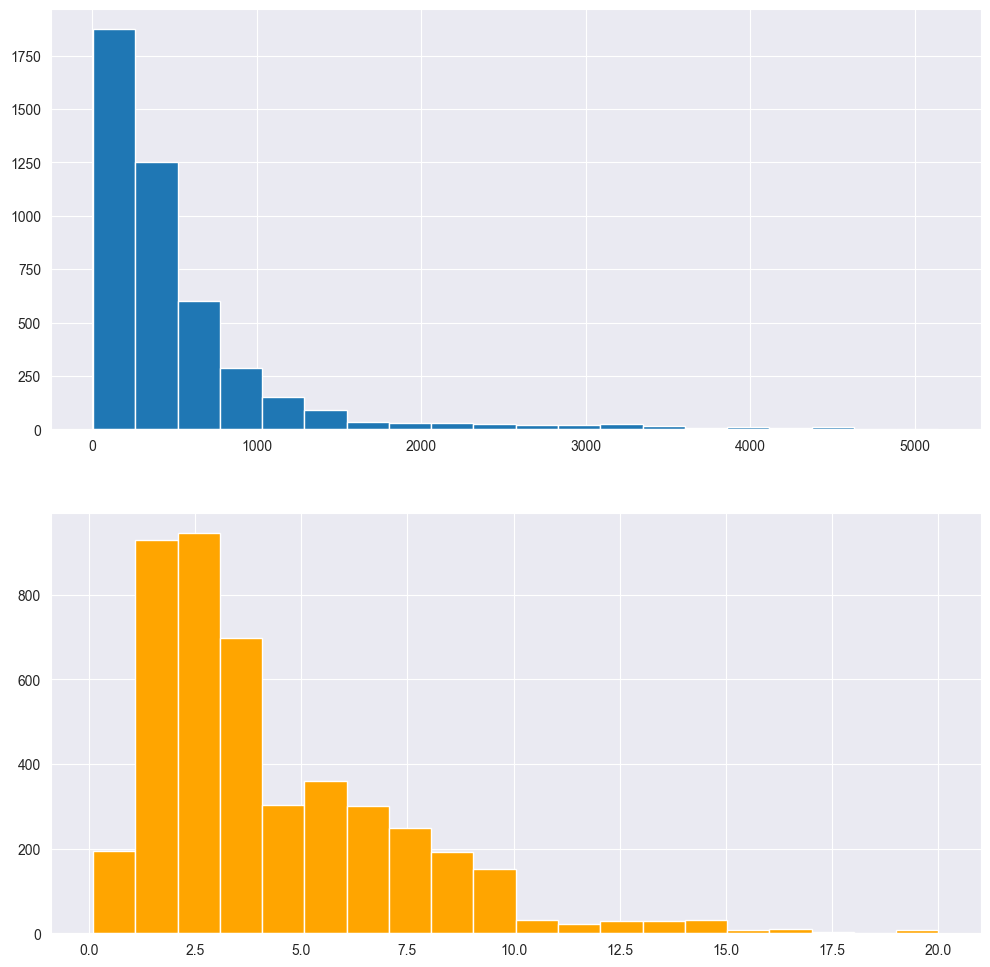

In [3]:
import matplotlib.pyplot as plt

f_hist, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (12,12))
ax1.hist(mean_cost_overmonth, bins=20)
ax2.hist(mean_duration_overmonth, bins=20, color='orange')
f_hist.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9592\3469819096.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


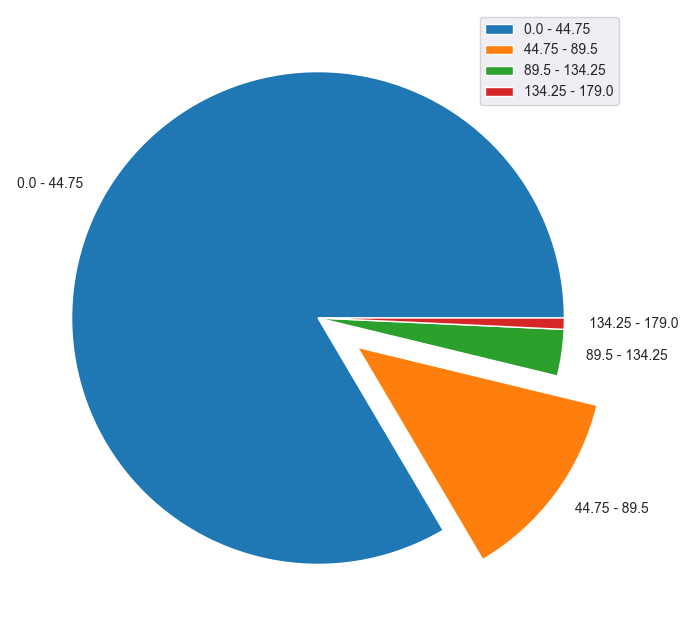

In [4]:
import numpy as np
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8, 8))
counts, ranges = np.histogram(sms_count_overmonth, 4)
ranges = [f'{ranges[i]} - {ranges[i+1]}' for i in range(0, len(ranges) - 1)]
ax.pie(counts, labels=ranges, shadow=False, explode=[0, 0.2, 0.0, 0.0])
ax.legend()
fig.show()

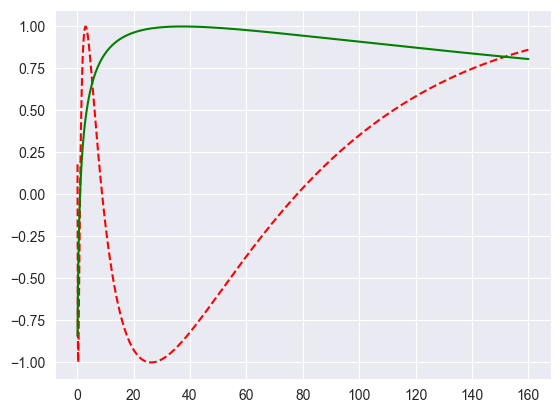

In [5]:
# сгенерируем свои данные и построим графики
x = np.arange(0.1, 160, 0.02)
y = np.sin(np.log2(x))
z = np.sin(np.log10(x))
plt.plot(x, y, 'r--')
plt.plot(x, z, 'g')

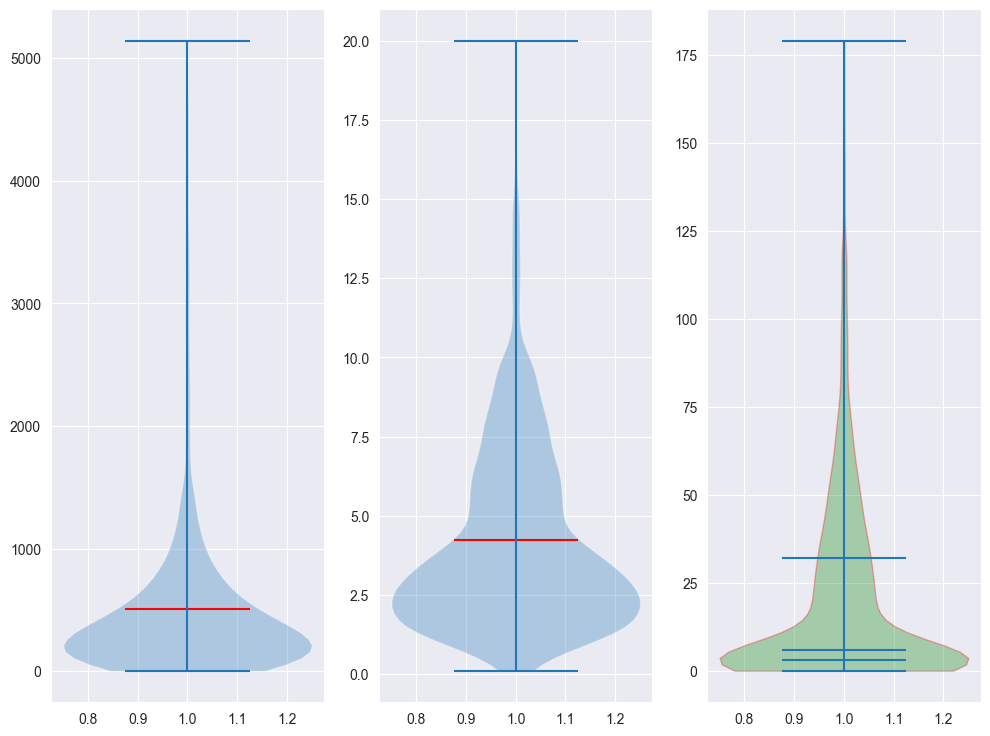

In [6]:
# построим скрипконит - скрипкографик
f_hist, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,9))
v1 = ax1.violinplot(mean_cost_overmonth, showmeans=True)
v1['cmeans'].set_edgecolor('red')
v2 = ax2.violinplot(mean_duration_overmonth, showmeans=True)
v2['cmeans'].set_edgecolor('red')
v3 = ax3.violinplot(sms_count_overmonth, quantiles=[0.25, 0.5, 0.75])
v3['bodies'][0].set_facecolor('green')
v3['bodies'][0].set_edgecolor('red')
plt.show()

In [16]:
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go

series = []
for t in dataset.columns.drop(['Код']):
    series.append(dataset[t])

[0       24
 1       51
 2       41
 3       35
 4       26
         ..
 4487    40
 4488    40
 4489    60
 4490    38
 4491    33
 Name: Возраст, Length: 4492, dtype: int64,
 0       121.54
 1       287.51
 2       113.70
 3       410.23
 4       537.60
          ...  
 4487    186.20
 4488    500.68
 4489    470.42
 4490    858.99
 4491    151.92
 Name: Среднемесячный расход, Length: 4492, dtype: float64,
 0       2.4
 1       1.7
 2       2.1
 3       5.6
 4       4.8
        ... 
 4487    3.7
 4488    6.0
 4489    3.5
 4490    9.3
 4491    1.5
 Name: Средняя продолжительность разговоров, Length: 4492, dtype: float64,
 0        12
 1       111
 2        41
 3        47
 4        58
        ... 
 4487     36
 4488     46
 4489     58
 4490     50
 4491     59
 Name: Звонков днем за месяц, Length: 4492, dtype: int64,
 0        65
 1       109
 2        27
 3        49
 4        77
        ... 
 4487     28
 4488     66
 4489    129
 4490     74
 4491     75
 Name: Звонков вечером за 

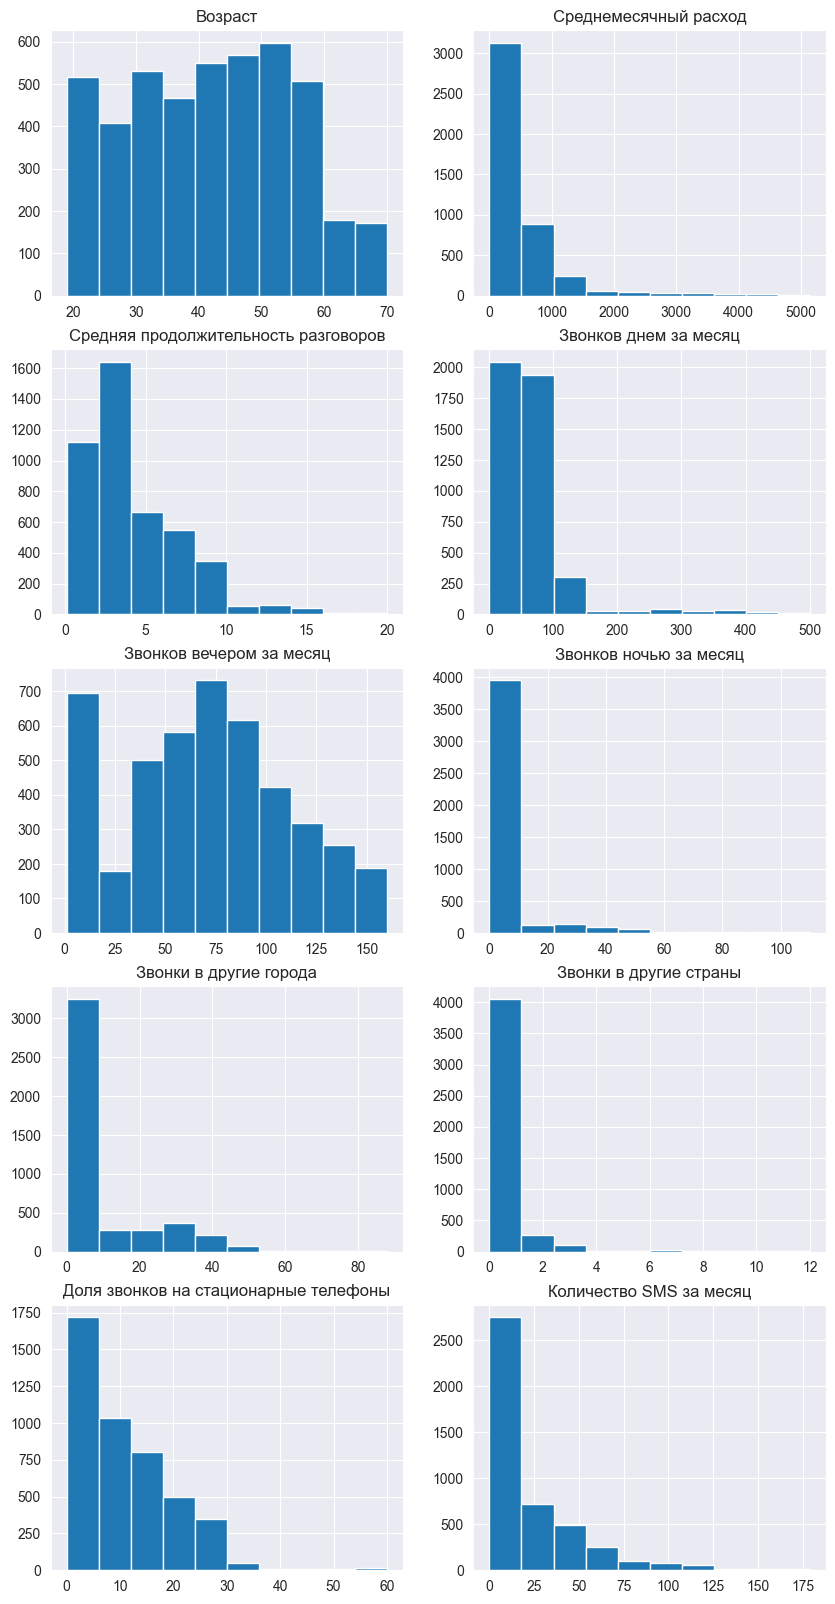

In [43]:
f_hist, axes = plt.subplots(nrows = len(series) // 2, ncols = 2, figsize = (len(series), len(series) * 2))
axes = axes.flatten()
for i, s in enumerate(series):
    axes[i].set_title(s.name)
    axes[i].hist(s, 10)

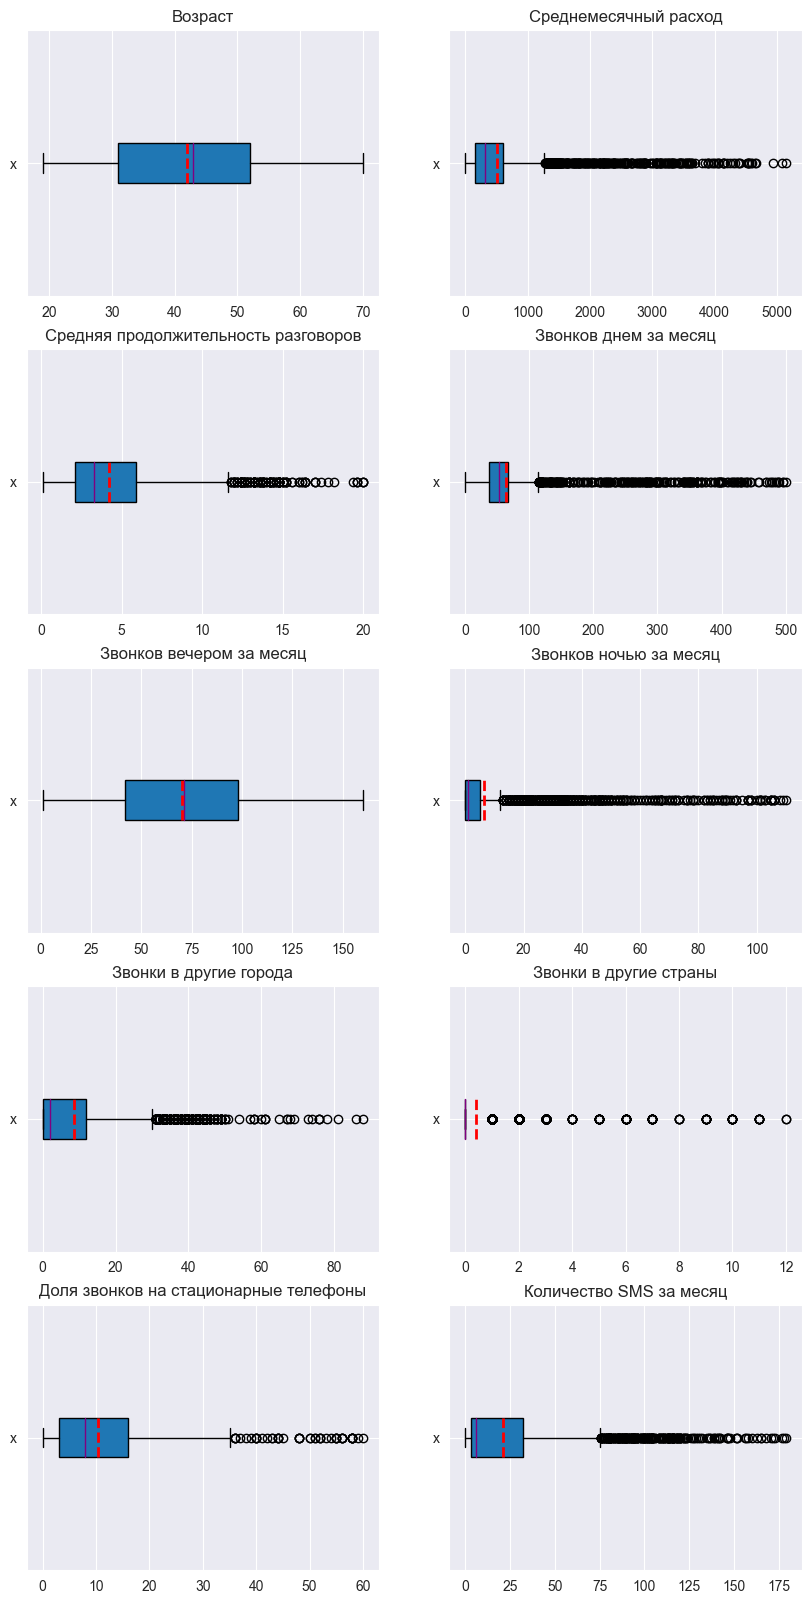

In [45]:
f_hist, axes = plt.subplots(nrows = len(series) // 2, ncols = 2, figsize = (len(series), len(series) * 2))
axes = axes.flatten()
for i, s in enumerate(series):
    axes[i].set_title(s.name)
    axes[i].boxplot(x=s, vert=False, showmeans=True, meanline=True, labels=('x'), patch_artist=True, medianprops={'linewidth': 1, 'color': 'purple'}, meanprops={'linewidth': 2, 'color': 'red'})

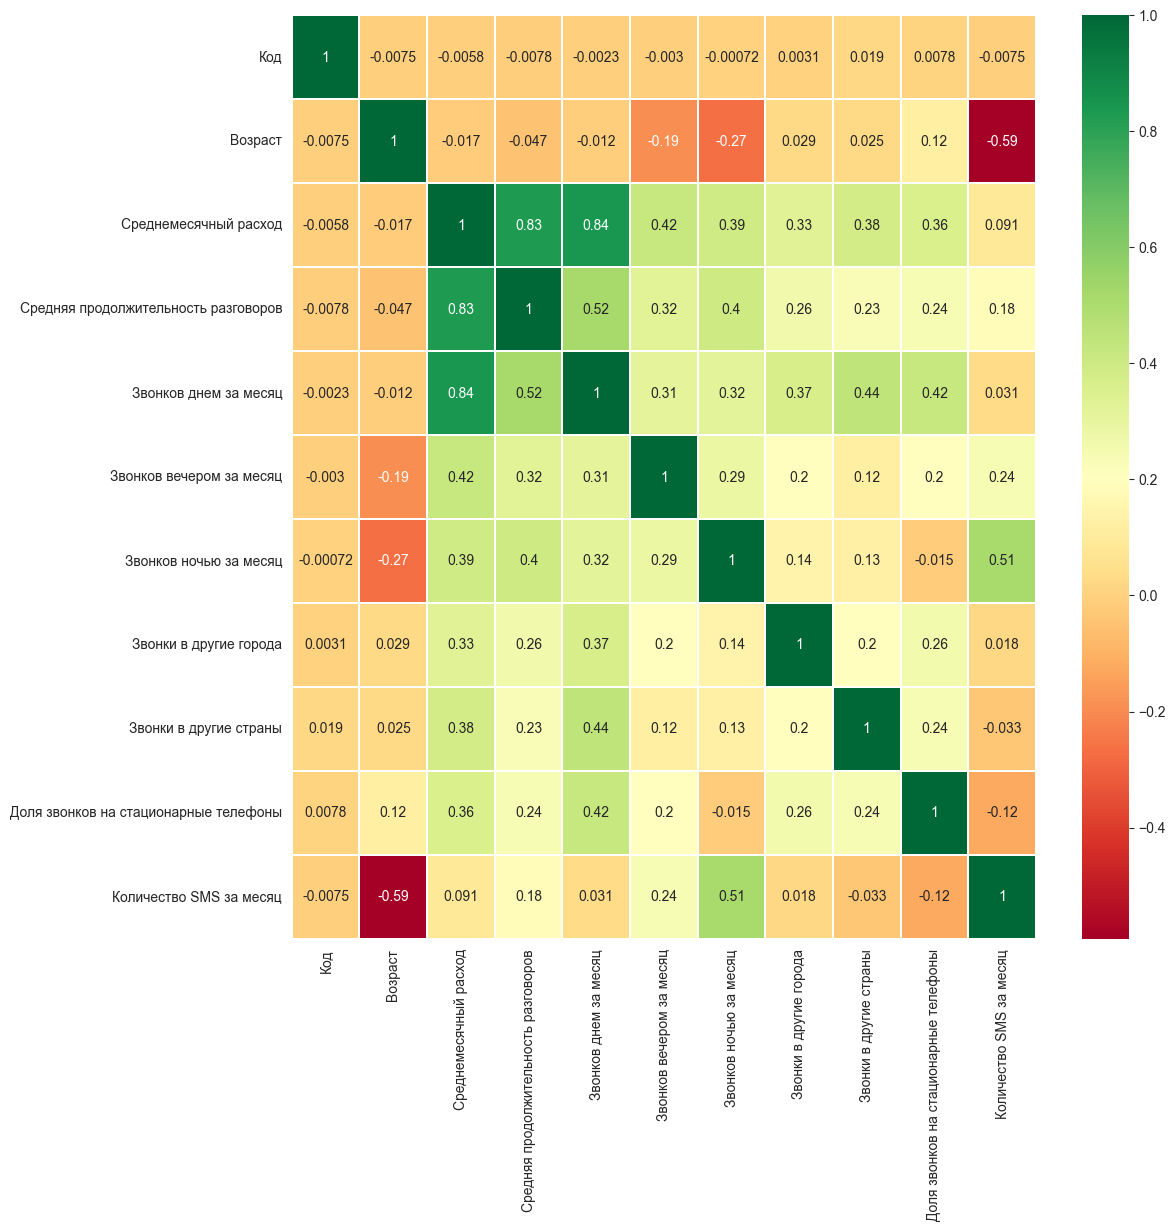

In [46]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.3)
fig=plt.gcf()
fig.set_size_inches(12,12)